In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_PATH = "/content/drive/MyDrive/Hypertension_Final_Project/cleaned_file/"

In [ ]:
%cd /content/drive/MyDrive/Hypertension_Final_Project/cleaned_file

/content/drive/.shortcut-targets-by-id/1uEZ1Y_1ZZvyod9Tj5ozCHC79Wm5ucrk4/Hypertension_Final_Project/cleaned_file


## *****read from here

In [ ]:
fillna_dummy = pd.read_csv(BASE_PATH + 'clean_get_dummy_fillna_master_v2.csv', index_col=0)
y_result = pd.read_csv(BASE_PATH + 'y_master_v2.csv', index_col=0)

In [ ]:
X_train=fillna_dummy.iloc[:21467,]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 38.8 MB


In [ ]:
y_train=y_result.iloc[:21467,]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 40434 to 19922
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   21467 non-null  float64
dtypes: float64(1)
memory usage: 335.4 KB


In [ ]:
# X_valid.info()

In [ ]:
X_valid=fillna_dummy.iloc[21467:(21467+7156),]
X_valid.info()
X_valid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 29283 to 3791
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 12.9 MB


,age,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,Spending_on_food,...,DR2DAY_4.0,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0
29283,14.0,38.5,169.3,13.40,18.5,68.8,5.021028e-82,0.279070,0.186047,0.534884,...,1,0,0,0,0,0,0,1,0,0
36274,15.0,51.6,162.8,19.50,25.5,65.5,6.204144e-82,0.183908,0.068966,0.747126,...,0,1,0,0,0,0,0,1,0,0
33902,19.0,71.4,167.2,25.50,32.0,82.5,5.330490e-02,0.136461,0.138593,0.671642,...,0,0,1,0,0,0,0,0,1,0
40623,80.0,55.8,150.0,24.80,26.8,86.3,6.927832e-02,0.190588,0.035442,0.720977,...,0,0,1,0,0,0,0,1,0,0
13992,20.0,64.3,169.4,22.41,28.8,80.0,5.025703e-82,0.279330,0.099628,0.621043,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
y_valid=y_result.iloc[21467:(21467+7156),]
y_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 29283 to 3791
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   7156 non-null   float64
dtypes: float64(1)
memory usage: 111.8 KB


In [ ]:
# X_test.info()

In [ ]:
X_test=fillna_dummy.iloc[(21467+7156):,]
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 10284 to 43800
Columns: 236 entries, age to DR2_300_9.0
dtypes: float64(159), int64(77)
memory usage: 12.9 MB


,age,Weight(kg),Height(cm),BMI,Arm_Circumference,Waist_Circumference,Spending_on_nonfood,Spending_on_eating_out,Spending_on_carryout_deliverred,Spending_on_food,...,DR2DAY_4.0,DR2DAY_5.0,DR2DAY_6.0,DR2DAY_7.0,DR2LANG_2.0,DR2LANG_3.0,DR2LANG_5.0,DR2_300_2.0,DR2_300_3.0,DR2_300_9.0
10284,80.0,68.1,156.1,27.95,32.0,97.9,2.698803e-81,2.698803e-81,2.698803e-81,1.000000,...,0,0,0,0,0,0,0,0,0,0
21855,9.0,30.7,136.3,16.50,20.5,58.7,9.813828e-82,2.727273e-01,9.813828e-82,0.727273,...,1,0,0,0,0,0,0,1,0,0
7948,69.0,66.9,163.4,25.06,28.5,96.8,2.522245e-81,2.990654e-01,2.522245e-81,0.700935,...,1,0,0,0,0,0,0,1,0,0
13403,62.0,92.4,169.7,32.09,36.2,107.4,9.090909e-02,3.636364e-01,4.585901e-82,0.545455,...,1,0,0,0,0,0,0,1,0,0
6269,9.0,35.9,134.1,19.96,22.7,71.8,7.766339e-82,1.223022e-01,1.438849e-02,0.863309,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
y_test=y_result.iloc[(21467+7156):,]
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7156 entries, 10284 to 43800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hyper   7156 non-null   float64
dtypes: float64(1)
memory usage: 111.8 KB


#Model

1.   List item
2.   List item



# with VIF

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
X_train_try= pd.read_csv(BASE_PATH + 'X_train_try.csv', index_col=0)

In [ ]:
remining_columns = X_train_try.columns
X_valid_try = X_valid.loc[:, X_valid.columns.isin(remining_columns)]
X_test_try = X_test.loc[:, X_test.columns.isin(remining_columns)]

## Logistic Regression

In [ ]:
logr_model_vif_pip = Pipeline([('sts', StandardScaler()),
                               ('logr', LogisticRegression())])
logr_model_vif_pip.fit(X_train_try, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Pipeline(steps=[('sts', StandardScaler()), ('logr', LogisticRegression())])

In [ ]:
y_pred = pd.Series(logr_model_vif_pip.predict(X_valid_try))
y_train_pred = pd.Series(logr_model_vif_pip.predict(X_train_try))

y_pred_proba = logr_model_vif_pip.predict_proba(X_valid_try)[::,1]
y_train_proba = logr_model_vif_pip.predict_proba(X_train_try)[::,1]


print ("Accuracy = ", accuracy_score(y_valid, y_pred))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, y_pred_proba)}')
print(f'Train F1: {f1_score(y_train, y_train_pred)}')
print(f'Test F1: {f1_score(y_valid, y_pred)}')


Accuracy =  0.8099496925656792
Train ROC AUC Score: 0.8912930871657487
Test ROC AUC  Score: 0.8855068971164834
Train F1: 0.754691441580016
Test F1: 0.7493549576115002


In [ ]:
import pandas as pd
import shap
import sklearn

In [ ]:
# model=logr_model_vif_pip.named_steps['logr']
# X=X_valid_try
# print("Model coefficients:\n")
# for i in range(X.shape[1]):
#     print(X.columns[i], "=", model.coef_[i].round(4))

In [ ]:
# #use model to predict probability that given y value is 1
# y_pred_proba = logr_model_vif_pip.predict_proba(X_valid_try)[::,1]

# #calculate AUC of model
# auc = metrics.roc_auc_score(y_valid, y_pred_proba)

# #print AUC score
# print(auc)

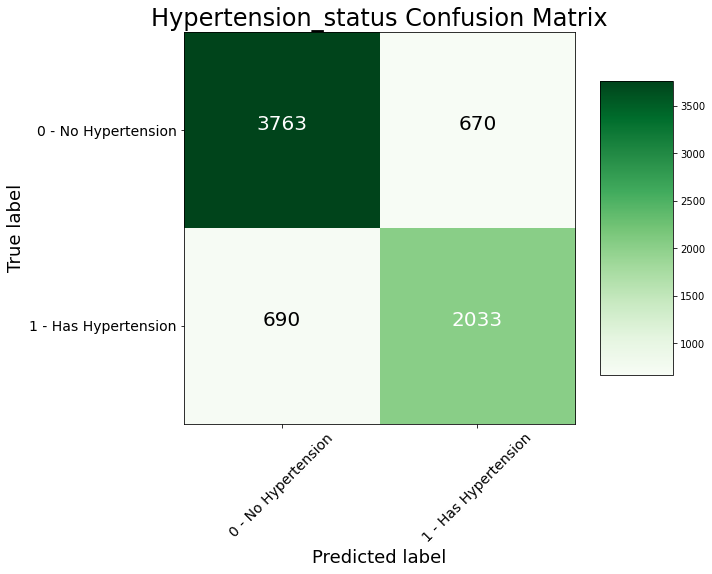

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),\
              fontsize = 20,\
              horizontalalignment="center",\
              color="white" if cm[i, j] > thresh else "black")
      plt.grid(None)
      plt.tight_layout()
      plt.ylabel('True label', size = 18)
      plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
logr_coeff_array = logr_model_vif_pip.named_steps['logr'].coef_
logr_coeff = logr_coeff_array.tolist()[0]
logr_coeff

[1.656191638180006,
 -0.031073598962522066,
 0.2047559825475436,
 0.4383047582078179,
 -0.01566931603339285,
 -0.031012129462919882,
 0.025047515885698698,
 -0.008174332210167588,
 0.004864364587527099,
 0.001823557975359467,
 -0.023739661714607688,
 -0.062007284005018,
 -0.04928624674977636,
 -0.0007194459628636467,
 -0.09003542094904728,
 0.03953864614230897,
 -0.08515606432176552,
 0.043757259594731396,
 0.020770420005426473,
 -0.02130268418318463,
 -0.002509184642549484,
 0.01530829214202323,
 0.005209796072320579,
 -0.019505430214263972,
 0.012267784761651369,
 -0.0835242362127419,
 0.0050630976057205014,
 0.01698128059384785,
 0.03164948958709342,
 0.05102610743867528,
 -0.028874302666240772,
 0.009712556157627748,
 -0.008375156368157562,
 -0.047416159869299764,
 0.06601351848181725,
 -0.04435827473324766,
 0.017895855281116167,
 -0.006467289933216707,
 -0.004195804138859758,
 0.0872954222752178,
 -0.0020197720819834417,
 0.07956047640642204,
 -0.010899948550043299,
 -0.002335585

In [ ]:
# len(logr_coeff)

In [ ]:
# logr_coeff

In [ ]:
logr_cols = X_train_try.columns.tolist()

In [ ]:
# len(logr_cols)

In [ ]:
# logr_cols

In [ ]:
importancy = dict(zip(logr_cols, logr_coeff))

In [ ]:
# importancy.items()

In [ ]:
# print(importancy)

In [ ]:
# importancy.keys()

In [ ]:
for k in sorted(importancy, key=importancy.get, reverse=True):
  print(k, importancy[k])

age 1.656191638180006
Waist_Circumference 0.4383047582078179
race_dummy_4.0 0.30736678455474525
Arm_Circumference 0.2047559825475436
race_dummy_5.0 0.15472049424521056
Education_dummy_2.0 0.13494533952063023
Education_dummy_3.0 0.13450682249479615
DR2TP183 0.13441426262866327
Education_dummy_4.0 0.1099064418087329
DR1TP182 0.10956334027446896
DBQ095Z_x_4.0 0.10164804377142797
DR1TSODI 0.0872954222752178
DR1TP225 0.08328960953105519
DR1TSELE 0.07956047640642204
Education_dummy_5.0 0.07644877211185906
DR2TVB12 0.07280007456418083
DR1TCALC 0.06601351848181725
DR2TM201 0.06041008610862631
DR2TALCO 0.059853662113063436
DBQ095Z_x_3.0 0.056127241853760286
DR1TALCO 0.054086846340976734
DR2TVB6 0.052607240695472166
DR1TFF 0.05102610743867528
DR2DBIH 0.04975231505797009
DR2TLYCO 0.04786337306299501
DBQ095Z_x_2.0 0.047289503193447095
DR2TSUGR 0.047288581380303375
DR2TP204 0.046597839942916316
DR2DAY_6.0 0.04581444545290189
DR2DAY_5.0 0.04492645971713955
DR1TATOA 0.043757259594731396
race_dummy_3.

In [ ]:
#{k: v for k, v in sorted(importancy.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
X1000 = shap.utils.sample(X_train_try, 1000)

In [ ]:
model=logr_model_vif_pip.named_steps['logr']
shap.plots.partial_dependence(
    "RM", model.predict, X1000, ice=False,
    model_expected_value=True, feature_expected_value=True
)


ValueError: ignored

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X1000)
shap_values = explainer()

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

#SHAP


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 15.1 MB/s 


In [ ]:
import shap

## Random Forest

In [ ]:
# Create the model with 100 trees
rf_model_vif = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
rf_model_vif.fit(X_train_try, y_train)
# Actual class predictions
rf_predictions = rf_model_vif.predict(X_valid_try)

train_probs = rf_model_vif.predict_proba(X_train_try)[:,1] 
probs = rf_model_vif.predict_proba(X_valid_try)[:, 1]
train_predictions = rf_model_vif.predict(X_train_try)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
print("Accuracy = ", accuracy_score(y_valid, rf_predictions))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')
print(f'Train F1: {f1_score(y_train, train_predictions)}')
print(f'Test F1: {f1_score(y_valid, rf_predictions)}')

Accuracy =  0.7973728339854668
Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8751864687265632
Train F1: 1.0
Test F1: 0.7337495409474843


In [ ]:
import shap
explainer = shap.Explainer(rf_model_vif)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

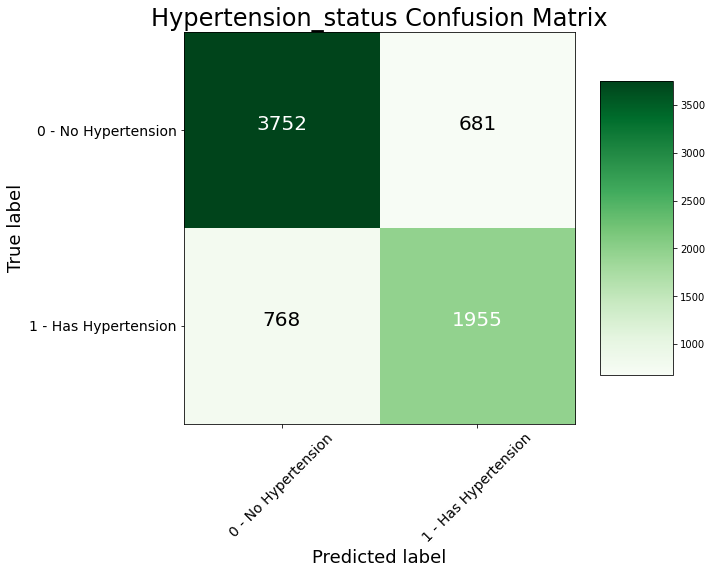

In [ ]:
cm = confusion_matrix(y_valid, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
feat_labels = X_train_try
feature_importance = []
# Print the name and gini importance of each feature
for feature in zip(feat_labels, model_rf.feature_importances_):
    feature_importance.append(feature)

sorted(feature_importance, key=lambda x: x[1], reverse=True)

NameError: ignored

## Decision Tree

In [ ]:
tree_params = {'max_depth': range(2, 12)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)

locally_best_tree.fit(X_train_try, y_train)

print("The best depth：{}".format(locally_best_tree.best_params_))

The best depth：{'max_depth': 4}


In [ ]:
decision_tree = DecisionTreeClassifier(criterion="gini",max_depth=4, random_state=17)
decision_tree.fit(X_train_try, y_train)

DecisionTreeClassifier(max_depth=4, random_state=17)

In [ ]:
y_pred = pd.Series(decision_tree.predict(X_valid_try))
y_train_pred = pd.Series(decision_tree.predict(X_train_try))

y_pred_proba = decision_tree.predict_proba(X_valid_try)[::,1]
y_train_proba = decision_tree.predict_proba(X_train_try)[::,1]


print ("Accuracy = ", accuracy_score(y_valid, y_pred))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, y_train_proba)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, y_pred_proba)}')
print(f'Train F1: {f1_score(y_train, y_train_pred)}')
print(f'Test F1: {f1_score(y_valid, y_pred)}')

Accuracy =  0.7993292342090553
Train ROC AUC Score: 0.8755950054276221
Test ROC AUC  Score: 0.8691025369025204
Train F1: 0.7526766595289078
Test F1: 0.7431127012522362


In [ ]:
import shap
explainer = shap.Explainer(decision_tree)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
#shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.beeswarm(shap_values)

ValueError: ignored

In [ ]:
import shap
explainer = shap.Explainer(decision_tree)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
cm = confusion_matrix(y_valid, y_pred)
plot_confusion_matrix(cm, classes = ['0 - No Hypertension', '1 - Has Hypertension'],
                      title = 'Hypertension_status Confusion Matrix')

In [ ]:
# import graphviz

# feature_name = X_train_try.columns
# dot_data = export_graphviz(decision_tree, out_file =None, feature_names=feature_name, class_names=["no_hypertension","has_hypertension"])
# graph = graphviz.Source(dot_data)
# graph

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_name = X_train_try.columns
 
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_name,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## XGboost

In [ ]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train_try, y_train) #For sklearn no one hot encoding

#Now predict using the trained XG model. 
xgboost_prediction = xgboost_model.predict(X_valid_try)

# Actual class predictions

train_probs = xgboost_model.predict_proba(X_train_try)[:,1] 
probs = xgboost_model.predict_proba(X_valid_try)[:, 1]
xgboost_train_predictions = xgboost_model.predict(X_train_try)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
print("Accuracy = ", accuracy_score(y_valid, xgboost_prediction))
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_valid, probs)}')
print(f'Train F1: {f1_score(y_train, xgboost_train_predictions)}')
print(f'Test F1: {f1_score(y_valid, xgboost_prediction)}')

Accuracy =  0.8056176634991615
Train ROC AUC Score: 0.9012186462321995
Test ROC AUC  Score: 0.886830890313766
Train F1: 0.7677628420547288
Test F1: 0.7487809283005237


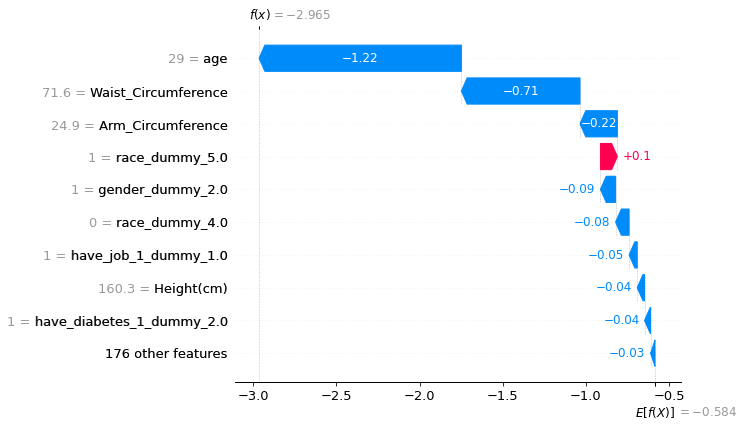

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

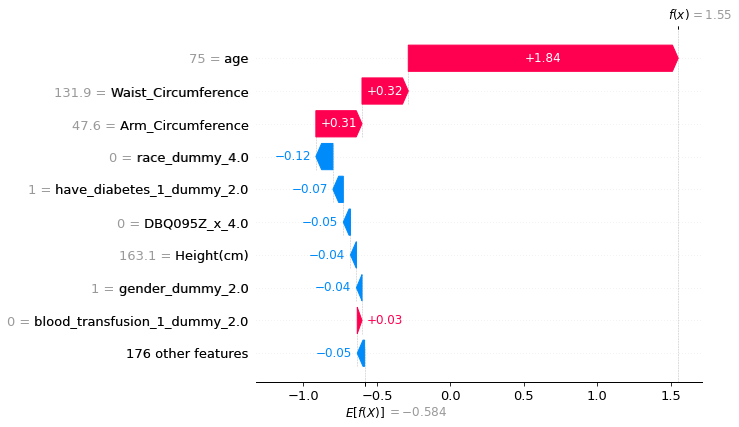

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

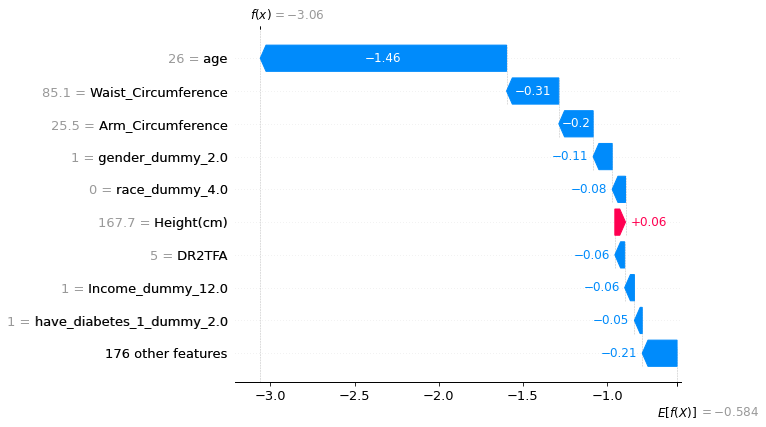

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[5])

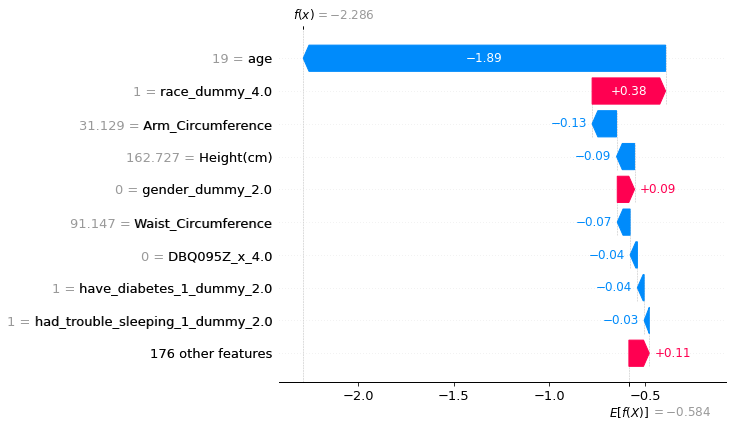

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[15])

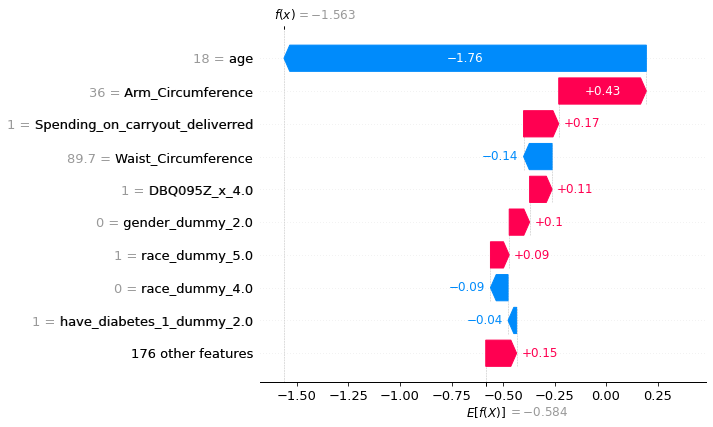

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[20])

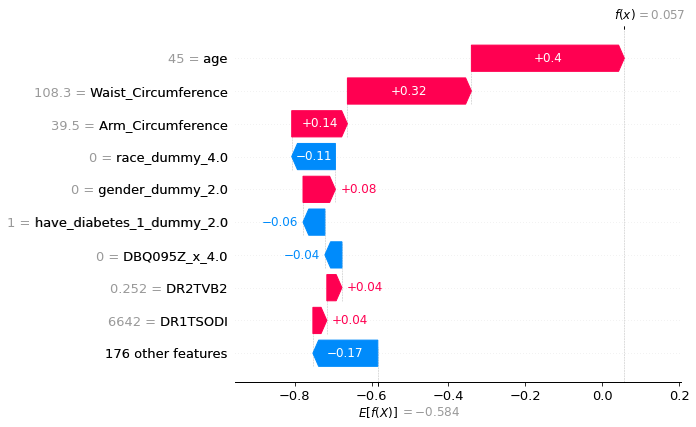

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[30])

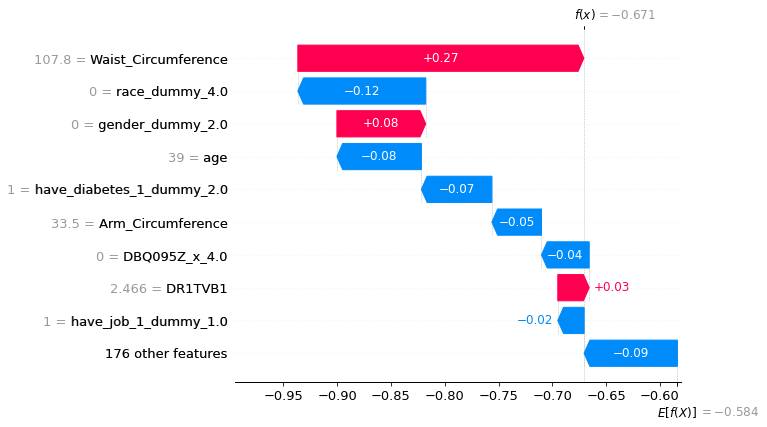

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[61])

In [ ]:
import shap
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_train_try)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[61])

In [ ]:
shap.plots.force(shap_values[5])


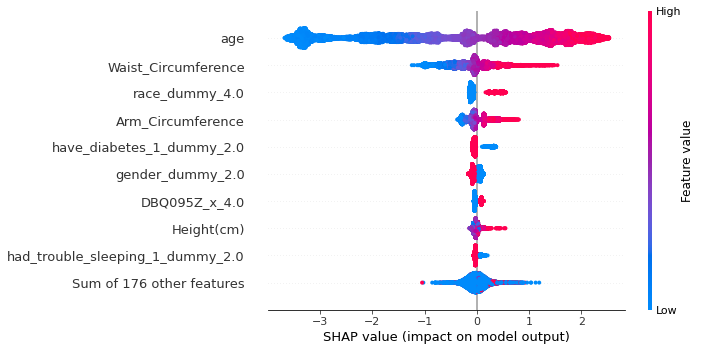

In [ ]:
shap.plots.beeswarm(shap_values)

# New Section